<p style='color:#1262c2; font-size:32px; text-align:left'> <strong> Digit Recognizer </strong>
</p>
<p style='color:#ffdd33; font-size:24px; text-align:right'>La Poste se modernise ... </p>

<img src="mnist.png">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, multilabel_confusion_matrix
%matplotlib inline

In [81]:
chiffres_train=pd.read_csv("/home/alex/SimplonIA/Enfer/LaPoste/data/train.csv", sep=",")
chiffres_test=pd.read_csv("/home/alex/SimplonIA/Enfer/LaPoste/data/test.csv", sep=",")
sample=pd.read_csv("/home/alex/SimplonIA/Enfer/LaPoste/data/sample_submission.csv", sep=",")

In [4]:
chiffres_train.columns
chiffres_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
print("Dimensions: ",chiffres_train.shape, "\n")

Dimensions:  (42000, 785) 



#### Jeu de données :

<p style='color:#1262c2; font-size:15px; text-align:left'> 
Le jeu de données contient 42000 individus (obsérvations) avec 784 features et 1 variable à expliquer, le label. Le label représente le numéro décrit par les pixels de ces 784 features de type int64. La valeur des pixels est un entière entre 0 et 255. Chaque image fait 28 pixels en hauteur et 28 pixels en largeur. 
</p>

In [6]:
chiffres_train.isna().sum()
# chiffres_test.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [82]:
chiffres_test.columns
chiffres_test.isna().sum()
chiffres_test.info()
chiffres_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [8]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [9]:
sample["Label"].unique()

array([0])

In [10]:
 chiffres_test_lables = pd.concat([sample, chiffres_test], axis=1)

In [11]:
 chiffres_test_lables["Label"].unique()

array([0])

In [12]:
sample.head(6)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0


In [13]:
chiffres_train["label category"]=chiffres_train.label.astype('category')
chiffres_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label category
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
chiffres_train.iloc[:,1:-1].head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
chiffres_train.iloc[:,1:-1].describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
sorted(chiffres_train["label"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

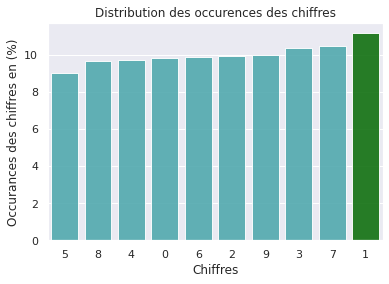

In [17]:
count_pourcent=(chiffres_train["label"].value_counts()/chiffres_train["label"].value_counts().sum())*100
count_pourcent=count_pourcent.sort_values(ascending=True)
colors = ['#42b7bd' if (elem < count_pourcent.values.max()) else ('green') for elem in np.array(count_pourcent)]
sns.set(style="darkgrid")
sns.barplot(x=count_pourcent.index, y=count_pourcent.values, alpha=0.9, order=count_pourcent.index, palette=colors)
plt.title('Distribution des occurences des chiffres')
plt.xticks(rotation=0)
plt.ylabel("Occurances des chiffres en (%)", fontsize=12)
plt.xlabel('Chiffres', fontsize=12)
plt.show()

In [18]:
count_pourcent.values.max()

11.152380952380952

In [19]:
np.array(count_pourcent)

array([ 9.03571429,  9.67380952,  9.6952381 ,  9.83809524,  9.85      ,
        9.9452381 ,  9.97142857, 10.35952381, 10.47857143, 11.15238095])

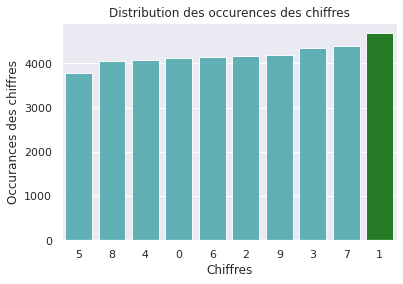

In [20]:
count=chiffres_train["label"].value_counts()
count=count.sort_values(ascending=True)
colors = ['#42b7bd' if (elem < count.values.max()) else ('green') for elem in np.array(count)]
sns.set(style="darkgrid")
sns.barplot(x=count.index, y=count.values, alpha=0.9, order=count.index, palette=colors)
plt.title('Distribution des occurences des chiffres')
plt.xticks(rotation=0)
plt.ylabel("Occurances des chiffres", fontsize=12)
plt.xlabel('Chiffres', fontsize=12)
plt.show()

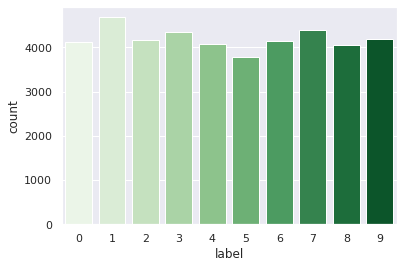

In [21]:
sns.countplot(chiffres_train['label'], palette="Greens")
plt.show()

In [22]:
chiffres_test.iloc[:,0:].describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


<p style='color:#ffdd33; font-size:24px; text-align:right'>Visualisation des données</p>

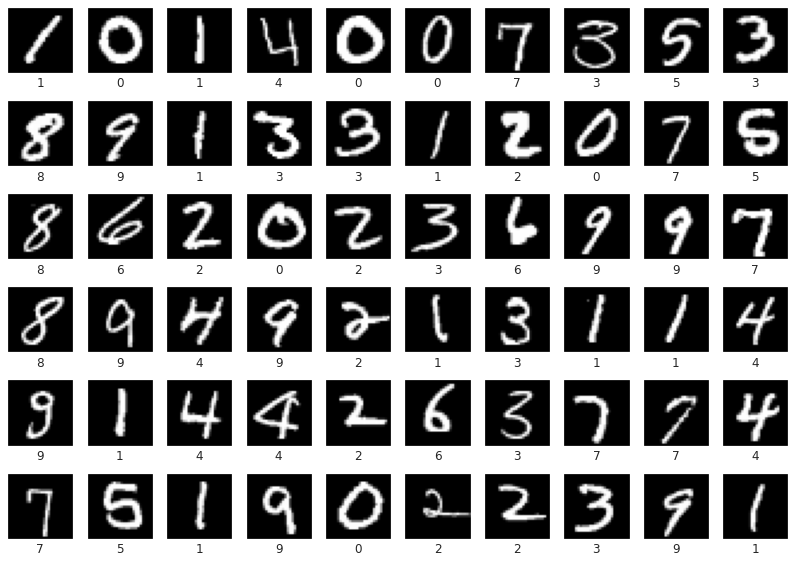

In [23]:
chiffre = np.matrix(chiffres_train.iloc[:,0:-1])
target =  chiffre[:, 0]
chiffre = np.delete(chiffre, 0, 1) #delete first column from the matrix chiffre that is in fact the label
fig, ax=plt.subplots(6, 10, figsize=(14,10))
for im, axfig in enumerate(ax.flat):
    axfig.imshow(chiffre[im].reshape(28,28), cmap='gray')
    axfig.set(xticks=[],yticks=[], xlabel=chiffres_train.iloc[im,0])

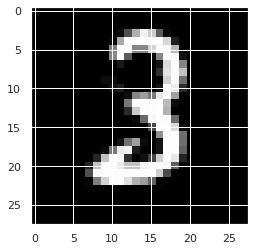

In [28]:
chiffre_t = np.matrix(chiffres_test)
img = chiffre_t[4].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

In [24]:
chiffres_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label category
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
chiffres_train_plot_corr = chiffres_train.drop(['label', "label category"], axis=1)
chiffres_train_plot_corr

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
chiffres_train_plot_corrmat = np.matrix(chiffres_train_plot_corr.iloc[:,:])
target =   np.matrix(chiffres_train.iloc[:,0])
reshaped=chiffres_train_plot_corrmat [0].reshape(28,28)

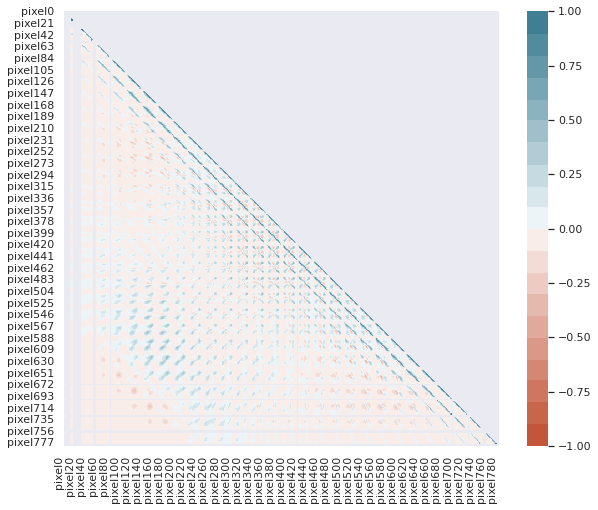

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = chiffres_train_plot_corr.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
# sns.heatmap(corr, 
#             cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True, mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [348]:
corr.isna().sum()

pixel0      784
pixel1      784
pixel2      784
pixel3      784
pixel4      784
           ... 
pixel779     76
pixel780    784
pixel781    784
pixel782    784
pixel783    784
Length: 784, dtype: int64

In [353]:
chiffres_train_corr_smaller=chiffres_train_plot_corr.iloc[0:20, :]
chiffres_train_corr_smaller.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
corr_smaller_matrix = chiffres_train_corr_smaller.corr()
corr_smaller_matrix.isna().sum()

pixel0      784
pixel1      784
pixel2      784
pixel3      784
pixel4      784
           ... 
pixel779    784
pixel780    784
pixel781    784
pixel782    784
pixel783    784
Length: 784, dtype: int64

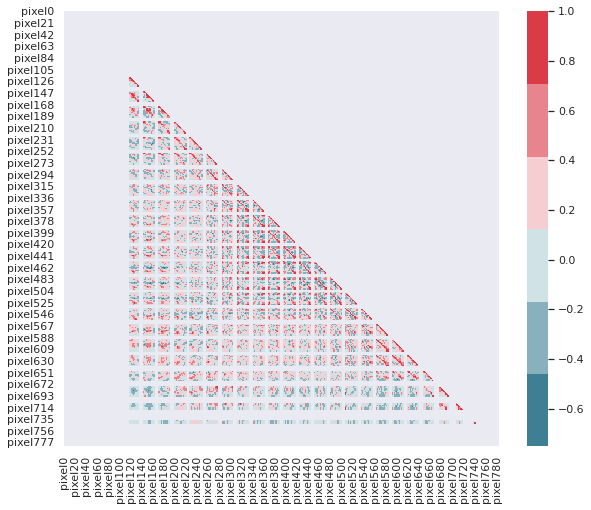

In [355]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_smaller_matrix = chiffres_train_corr_smaller.corr()
mask = np.triu(np.ones_like(corr_smaller_matrix, dtype=bool))
sns.heatmap(corr_smaller_matrix, mask=mask,
            cmap=sns.diverging_palette(220, 10),
            square=True, ax=ax) 

$Wiki$: Le coefficient de corrélation entre deux variables aléatoires réelles X et Y ayant chacune une variance notée $Cov(X,Y)$, ou parfois ${\displaystyle \rho _{XY}}$, ou  ${\displaystyle r_{p}}$, ou simplement $ {\displaystyle r}$, est défini par : 
$r=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$ où 
    ${Cov}(X,Y)$ désigne la covariance des variables X et Y,
    ${\displaystyle \sigma _{X}}$ et ${\displaystyle \sigma _{Y}}$ désignent leurs écarts types.

- En inspectant les écarts-types des variables explicatives on constate qu'une majorité des variables explicatives ont un écart-type = 0. Cela explique que la matrice de corrélation contient une proportion importante d'NaN.

In [356]:
chiffres_train.shape

(42000, 786)

In [6]:
chiffres_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label category
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X=chiffres_train.iloc[:,1:chiffres_train.shape[1]-1]
y=chiffres_train["label"]

In [8]:
X.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p style='color:#1262c2; font-size:24px; text-align:right'>Échantillonnage des données. Test de Kolmogorov-Smirnov.</p>

In [27]:
_, X_sample, _, y_sample = train_test_split(X, y, shuffle=True, test_size=1/3.0, stratify=y, random_state=42)

In [96]:
X_sample.shape, y_sample.shape

((14000, 784), (14000,))

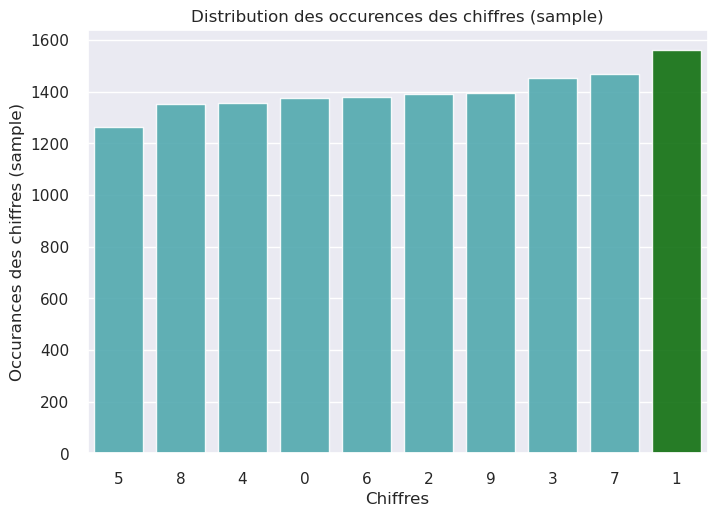

In [180]:
# sns.countplot(pd.DataFrame(y_sample)['label'], palette="Greens")
# plt.show()
count=pd.DataFrame(y_sample)['label'].value_counts()
count=count.sort_values(ascending=True)
colors = ['#42b7bd' if (elem < count.values.max()) else ('green') for elem in np.array(count)]
sns.set(style="darkgrid")
sns.barplot(x=count.index, y=count.values, alpha=0.9, order=count.index, palette=colors)
plt.title('Distribution des occurences des chiffres (sample)')
plt.xticks(rotation=0)
plt.ylabel("Occurances des chiffres (sample)", fontsize=12)
plt.xlabel('Chiffres', fontsize=12)
plt.show()

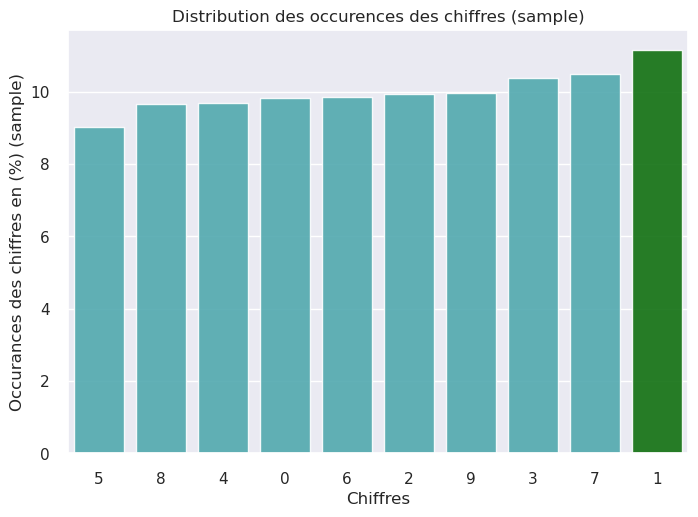

In [207]:
count_pourcent_s=(pd.DataFrame(y_sample)['label'].value_counts()/pd.DataFrame(y_sample)['label'].value_counts().sum())*100
count_pourcent_s=count_pourcent_s.sort_values(ascending=True)
colors = ['#42b7bd' if (elem < count_pourcent_s.values.max()) else ('green') for elem in np.array(count_pourcent_s)]
sns.set(style="darkgrid")
sns.barplot(x=count_pourcent_s.index, y=count_pourcent_s.values, alpha=0.9, order=count_pourcent_s.index, palette=colors)
plt.title('Distribution des occurences des chiffres (sample)')
plt.xticks(rotation=0)
plt.ylabel("Occurances des chiffres en (%) (sample)", fontsize=12)
plt.xlabel('Chiffres', fontsize=12)
plt.show()

In [97]:
stat_sample=X_sample.describe()
stat_sample

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.0,14000.0,14000.0,14000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218429,0.104357,0.066071,0.016786,0.017429,0.004429,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.950831,4.309600,3.575619,1.262838,2.062176,0.523996,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,253.000000,128.000000,244.000000,62.000000,0.0,0.0,0.0,0.0


In [98]:
sample_nonzero_mean=stat_sample[stat_sample.columns[(stat_sample.iloc[1,:]>0)]]

In [99]:
sample_nonzero_mean

,pixel12,pixel13,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.008286,0.018143,0.004929,0.028786,0.056286,0.073214,0.143929,0.169643,0.175929,0.172357,...,0.739643,0.733929,0.554071,0.357429,0.218429,0.104357,0.066071,0.016786,0.017429,0.004429
std,0.980379,2.146692,0.566504,2.291329,3.303576,3.545485,5.429854,5.907761,5.489391,5.436692,...,11.514564,11.867118,10.254059,8.025610,5.950831,4.309600,3.575619,1.262838,2.062176,0.523996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,116.000000,254.000000,67.000000,254.000000,254.000000,243.000000,255.000000,255.000000,254.000000,254.000000,...,254.000000,253.000000,254.000000,254.000000,253.000000,253.000000,253.000000,128.000000,244.000000,62.000000


In [100]:
stat_X=X.describe()
stat_X_nonzero_mean=stat_X[stat_X.columns[(stat_X.iloc[1,:]>0)]]

In [101]:
len(stat_X_nonzero_mean.columns.values)

708

In [104]:
sample_nonzero_mean.columns_as_set = set(list(sample_nonzero_mean.columns))

In [105]:
intersection = sample_nonzero_mean.columns_as_set.intersection(list(stat_X_nonzero_mean.columns))

In [106]:
len(intersection)

680

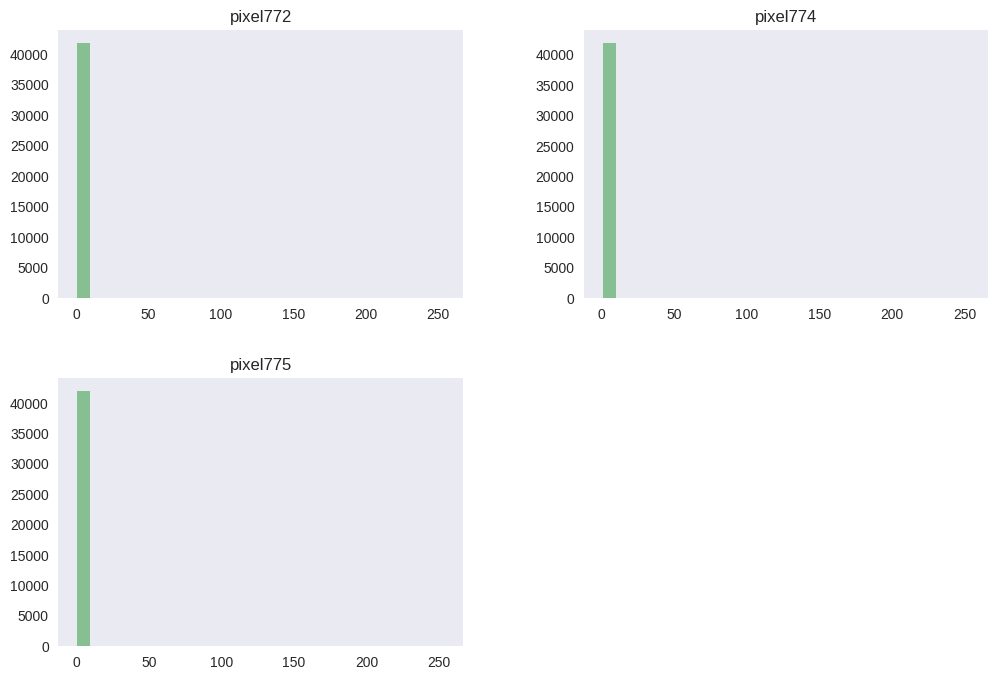

In [107]:
ax = X.hist(column=['pixel774', "pixel772", "pixel775"], bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

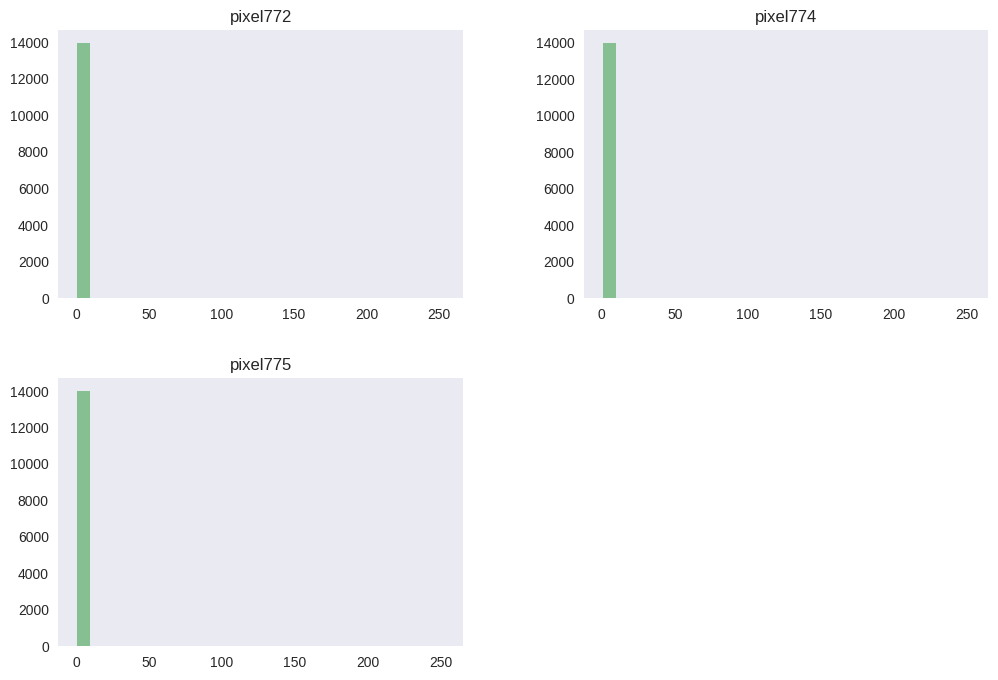

In [108]:
ax = X_sample.hist(column=['pixel774', "pixel772", "pixel775"], bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [112]:
len(intersection)

680

In [122]:
from scipy.stats import ks_2samp
ks_2samp(X_sample["pixel774"], X["pixel774"])

KstestResult(statistic=0.0003333333333332966, pvalue=1.0)

- Numerical variables must be checked with the Kolmogorov-Smirnov test. If we have categorical variables need Pearson’s $\chi²$ test.

In [131]:
p_values = dict()

for col in intersection:   
    p_values[col] = ks_2samp(X_sample[col],X[col])

In [158]:
pvalues=[]
for key in p_values.keys():
    pvalues.append(p_values[key].pvalue)

In [162]:
list_pvalue=[value for value in pvalues if value<0.06]
if not list_pvalue:
    print("All the p-values are greater than 5%. The sample is statistically significant.")
else:
    print("There are p-values that are smaller than 5%. The sample is not statistically significant.")

All the p-values are greater than 5%. The sample is statistically significant.


In [28]:
def Standartize_variables(X):
    scaler=MinMaxScaler()
    X_std = scaler.fit_transform(X)
    return(X_std, scaler)

In [118]:
X_sample.shape, X.shape

((14000, 784), (42000, 784))

In [135]:
def PCA(X, y):
    X_scaled,_=Standartize_variables(X)

    pca=decomposition.PCA(n_components=784, svd_solver = 'randomized', whiten = True)
    pca.fit(X_scaled)

    explain_ratio = pca.explained_variance_ratio_ * 100 #calculate variance ratios

    X_projected=pca.transform(X_scaled)

    fig, ax = plt.subplots(figsize=(15,7))
    plt.tight_layout()
    ax.set_xlabel('1st composante')
    ax.set_ylabel('2nd composante')
    ax.set_title('')
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, alpha=0.5)
    plt.colorbar()
    return pca

In [136]:
def plot_PCA(pca):
    fig, ax = plt.subplots()
    plt.tight_layout()
    ax.set_xlabel('Composantes principales')
    ax.set_ylabel('Variance expliquée (%)')
    ax.set_title('Contribution cumulative des composantes')
    plt.plot(pca.explained_variance_ratio_*100)
    plt.plot(pca.explained_variance_ratio_.cumsum()*100)
    plt.plot(np.cumsum((pca.explained_variance_ratio_)* 100))
    plt.grid(True)

In [137]:
def plot_PCA_i(pca):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.bar(range(len(pca.explained_variance_ratio_*100)), pca.explained_variance_ratio_*100)
    ax.set_xlabel('Composante individuelle')
    ax.set_ylabel('Variance expliquée individuelle (%))')
    plt.title('Contribution individuelle des composantes')
    plt.xlim(0, 60)
    plt.grid(True)

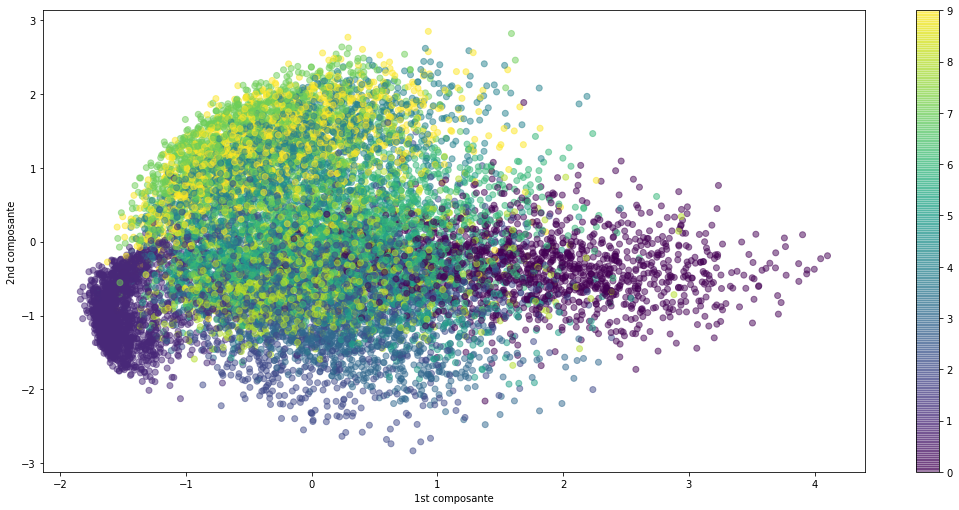

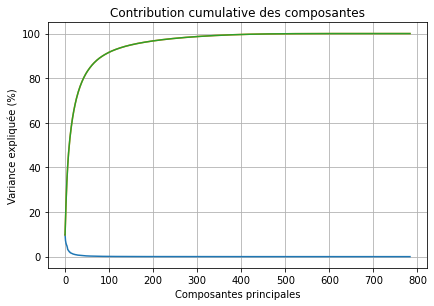

In [138]:
plot_PCA(PCA(X_sample, y_sample))

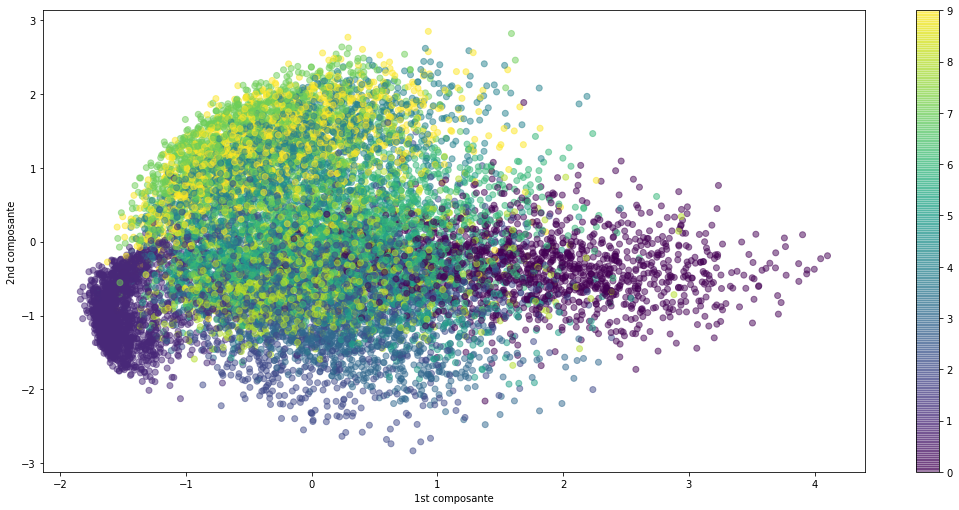

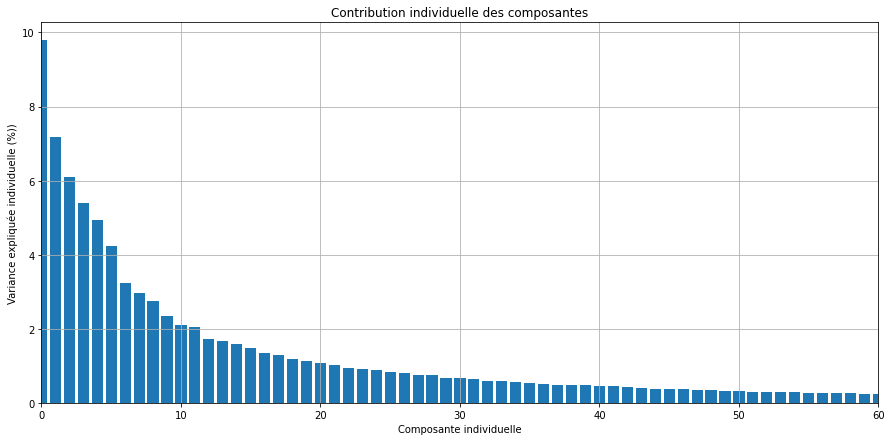

In [139]:
plot_PCA_i(PCA(X_sample, y_sample))

In [124]:
X.shape, y.shape

((42000, 784), (42000,))

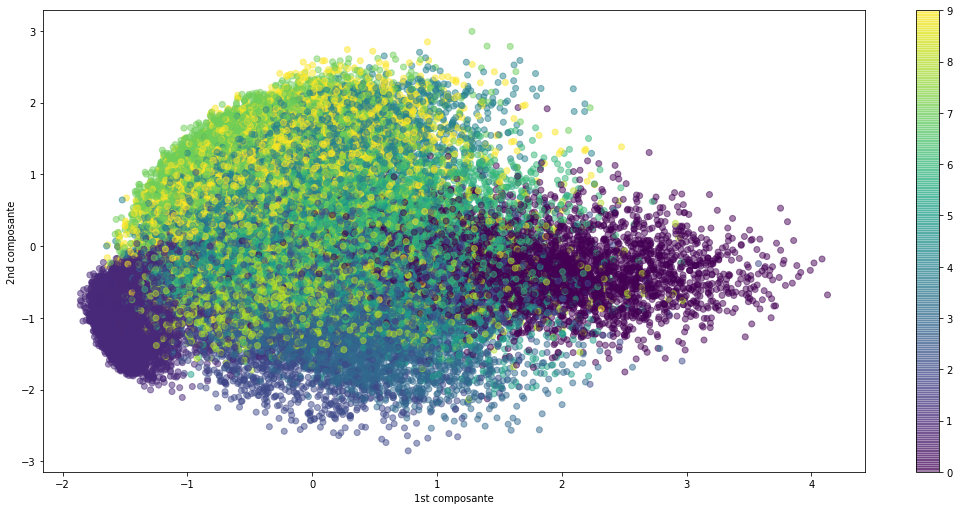

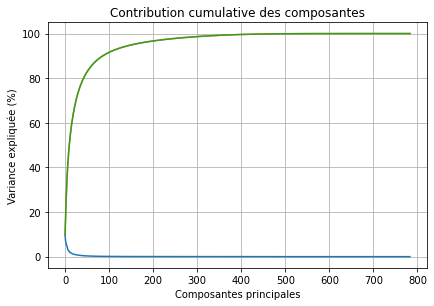

In [125]:
plot_PCA(PCA(X, y))

<p style='color:#ffdd33; font-size:24px; text-align:right'>Étude de kernel dans le modèle SVM</p>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, shuffle=True, test_size=0.2, stratify=y_sample, random_state=42)

In [171]:
X_train.shape, X_test.shape

((11200, 784), (2800, 784))

In [194]:
y_train.values

array([6, 0, 6, ..., 7, 3, 6])

In [30]:
X_train_scaled,scaler=Standartize_variables(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
def choose_kernel(kernel, X_train_scaled, y_train, X_test_scaled, y_test):
    svc_model=SVC(kernel=kernel, random_state=42)
    svc_model.fit(X_train_scaled, y_train)
    score=svc_model.score(X_train_scaled, y_train)
    y_predict=svc_model.predict(X_test_scaled)
    accuracy=accuracy_score(y_true=y_test, y_pred=y_predict)
    confusion=confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4,5,6,7,8,9])
    print(classification_report(y_test, y_predict))
    return score, accuracy, confusion 

In [32]:
score_lin, accuracy_lin, cm_lin=choose_kernel('linear', X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       276
           1       0.94      0.98      0.96       312
           2       0.90      0.94      0.92       278
           3       0.90      0.90      0.90       290
           4       0.90      0.95      0.93       272
           5       0.90      0.86      0.88       253
           6       0.96      0.94      0.95       276
           7       0.94      0.92      0.93       293
           8       0.90      0.86      0.88       271
           9       0.93      0.90      0.91       279

    accuracy                           0.92      2800
   macro avg       0.92      0.92      0.92      2800
weighted avg       0.92      0.92      0.92      2800



In [33]:
score_poly, accuracy_poly, cm_poly=choose_kernel('poly', X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       276
           1       0.93      0.99      0.96       312
           2       0.97      0.96      0.97       278
           3       0.97      0.93      0.95       290
           4       0.96      0.96      0.96       272
           5       0.90      0.94      0.92       253
           6       0.96      0.97      0.96       276
           7       0.96      0.97      0.96       293
           8       0.95      0.92      0.93       271
           9       0.97      0.93      0.95       279

    accuracy                           0.95      2800
   macro avg       0.95      0.95      0.95      2800
weighted avg       0.95      0.95      0.95      2800



In [34]:
score_rbf, accuracy_rbf, cm_rbf=choose_kernel('rbf', X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       276
           1       0.96      0.98      0.97       312
           2       0.95      0.99      0.97       278
           3       0.96      0.93      0.95       290
           4       0.97      0.96      0.96       272
           5       0.93      0.94      0.93       253
           6       0.97      0.98      0.98       276
           7       0.97      0.96      0.96       293
           8       0.95      0.96      0.95       271
           9       0.96      0.93      0.95       279

    accuracy                           0.96      2800
   macro avg       0.96      0.96      0.96      2800
weighted avg       0.96      0.96      0.96      2800



In [50]:
def plot_cm(cm, title, classes, normalize=False):

    plt.imshow(cm, interpolation='nearest', cmap="Blues")
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    
    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

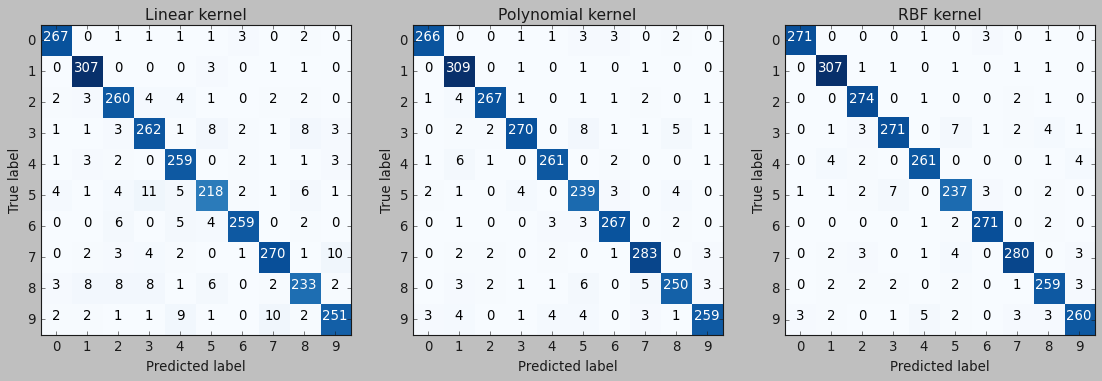

In [57]:
plt.style.use('classic')
class_names = [0,1,2,3,4,5,6,7,8,9]
fig = plt.figure(figsize = (17,7))
plt.subplot(131)
cm_model=cm_lin
plot_cm(cm_model, 'Linear kernel', class_names, normalize=False)
plt.subplot(132)
cm_model=cm_poly
plot_cm(cm_model, 'Polynomial kernel', class_names, normalize=False)
plt.subplot(133)
cm_model=cm_rbf
plot_cm(cm_model, 'RBF kernel', class_names, normalize=False)

In [35]:
scores_kernels={"kernel":['linear','poly','rbf'],"scores":[score_lin,score_poly,score_rbf],
                "accuracy": [accuracy_lin, accuracy_poly, accuracy_rbf]}

In [36]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [37]:
scores_kernels=pd.DataFrame.from_dict(scores_kernels).set_index('kernel')
# Set colormap equal to seaborns light green color palette
cm = sns.light_palette("green", as_cmap=True)

(scores_kernels.style
  .background_gradient(cmap=cm, subset=['scores'])
  .highlight_max(subset=['accuracy'])
  .set_caption('Kernels Performance')
  .set_table_styles(styles))

,scores,accuracy
kernel,,
linear,0.995893,0.923571
poly,0.986250,0.953929
rbf,0.985268,0.961071


In [190]:
scores_kernels.reset_index().columns

Index(['kernel', 'scores', 'accuracy'], dtype='object')

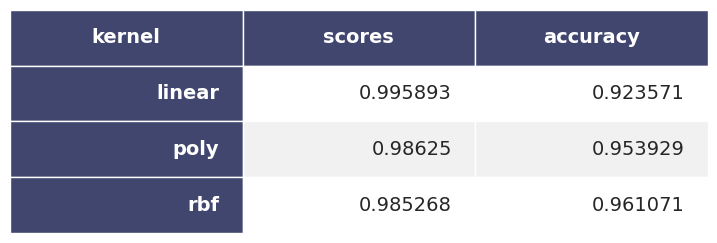

In [205]:
import six
def render_mpl_table(data, col_width=6.0, row_height=0.725, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(scores_kernels.reset_index().round(6), header_columns=1, col_width=3.0)

In [42]:
class_names = [0,1,2,3,4,5,6,7,8,9]

In [41]:
cm_lin_plot = pd.DataFrame(cm_lin, index = class_names, columns = class_names )
cm_poly_plot = pd.DataFrame(cm_poly, index = class_names, columns = class_names )
cm_rbf_plot = pd.DataFrame(cm_rbf, index = class_names, columns = class_names )

In [43]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [44]:
display_side_by_side([cm_lin_plot,cm_poly_plot,cm_rbf_plot],["Linear", "Polynomial", "RBF"])

,0,1,2,3,4,5,6,7,8,9
0,267,0,1,1,1,1,3,0,2,0
1,0,307,0,0,0,3,0,1,1,0
2,2,3,260,4,4,1,0,2,2,0
3,1,1,3,262,1,8,2,1,8,3
4,1,3,2,0,259,0,2,1,1,3
5,4,1,4,11,5,218,2,1,6,1
6,0,0,6,0,5,4,259,0,2,0
7,0,2,3,4,2,0,1,270,1,10
8,3,8,8,8,1,6,0,2,233,2
9,2,2,1,1,9,1,0,10,2,251


<p style='color:#ffdd33; font-size:24px; text-align:right'>Optimisation des paramètres</p>

In [343]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
parameters = [{'C': [0.1, 1., 5, 10], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001]}]

svc_model=SVC(random_state=42)

grid_search_svc = GridSearchCV(estimator =  svc_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           return_train_score=True,
                           cv = folds,
                           n_jobs = -1)

In [344]:
grid_search_svc = grid_search_svc.fit(X_train_scaled, y_train)

In [346]:
grid_search_svc.best_estimator_

SVC(C=10, gamma=0.01, random_state=42)

In [169]:
# grid_search_svc_results = pd.DataFrame(grid_search_svc.cv_results_)

In [348]:
y_predict_op=grid_search_svc.predict(X_test_scaled)

In [360]:
score=grid_search_svc.score(X_train_scaled, y_train)

In [361]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_predict_op)

In [372]:
info_optim={"kernel":['RBF', 'RBF + optimized C and Gamma'],"scores":[score_rbf, score],
                "accuracy": [accuracy_rbf, accuracy]}

info_optim=pd.DataFrame.from_dict(info_optim)

(info_optim.style
  .background_gradient(cmap=cm, subset=['scores'])
  .highlight_max(subset=['accuracy'])
  .set_caption('Performace for the RBF kernel with either default or optimized C and Gamma')
  .set_table_styles(styles))

,kernel,scores,accuracy
0,RBF,0.985268,0.961071
1,RBF + optimized C and Gamma,0.999732,0.965357


In [357]:
confusion_optim=confusion_matrix(y_test, y_predict_op)
confusion_optim_plot = pd.DataFrame(confusion_optim, index = class_names, columns = class_names )

In [373]:
display_side_by_side([cm_rbf_plot, confusion_optim_plot],["RBF","RBF with optimized parameters"])

,0,1,2,3,4,5,6,7,8,9
0,271,0,0,0,1,0,3,0,1,0
1,0,307,1,1,0,1,0,1,1,0
2,0,0,274,0,1,0,0,2,1,0
3,0,1,3,271,0,7,1,2,4,1
4,0,4,2,0,261,0,0,0,1,4
5,1,1,2,7,0,237,3,0,2,0
6,0,0,0,0,1,2,271,0,2,0
7,0,2,3,0,1,4,0,280,0,3
8,0,2,2,2,0,2,0,1,259,3
9,3,2,0,1,5,2,0,3,3,260


In [45]:
# Modèle avec les paramètres optimaux C = 10, gamma=0.01, random_state=42
svc_rbf_optim = SVC(C= 10, gamma= 0.01, kernel='rbf', random_state=42)
svc_rbf_optim.fit(X_train_scaled, y_train) 
y_predict_rbf_optim = svc_rbf_optim.predict(X_test_scaled) 
score_svc_rbf_optim = svc_rbf_optim.score(X_train_scaled, y_train)
accuracy_svc_rbf_optim = accuracy_score(y_test, y_predict_rbf_optim) 

In [93]:
print("The score and accuracy of the optimized SVM model are {} and {}.".format(score_svc_rbf_optim, accuracy_svc_rbf_optim))

The score and accuracy of the optimized SVM model are 0.9997321428571428 and 0.9653571428571428.


In [94]:
score_svc_rbf_optim_test = svc_rbf_optim.score(X_test_scaled, y_test)

In [95]:
print("The score on the test set of the optimized SVM model is {}.".format(score_svc_rbf_optim_test))

The score on the test set of the optimized SVM model is 0.9653571428571428.


In [170]:
print(classification_report(y_test, y_predict_rbf_optim))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       276
           1       0.98      0.99      0.98       312
           2       0.96      0.98      0.97       278
           3       0.96      0.96      0.96       290
           4       0.97      0.97      0.97       272
           5       0.94      0.94      0.94       253
           6       0.97      0.97      0.97       276
           7       0.97      0.96      0.97       293
           8       0.97      0.95      0.96       271
           9       0.96      0.94      0.95       279

    accuracy                           0.97      2800
   macro avg       0.97      0.96      0.96      2800
weighted avg       0.97      0.97      0.97      2800



<Figure size 640x640 with 0 Axes>

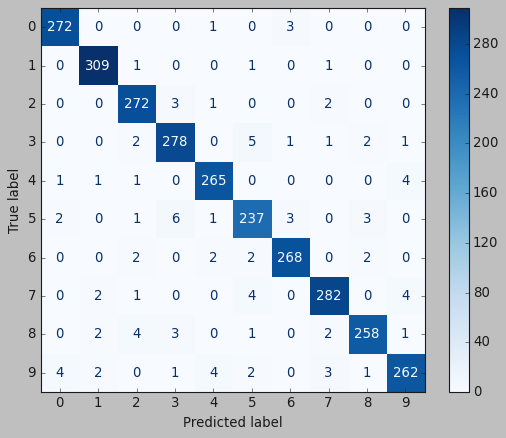

In [48]:
plt.style.use('classic')
plt.figure(figsize=(8,8))
plot_confusion_matrix(svc_rbf_optim, X_test_scaled, y_test, cmap=plt.cm.Blues, include_values=True) 

In [58]:
cm_rbf_optim=confusion_matrix(y_test, y_predict_rbf_optim, labels=[0,1,2,3,4,5,6,7,8,9])

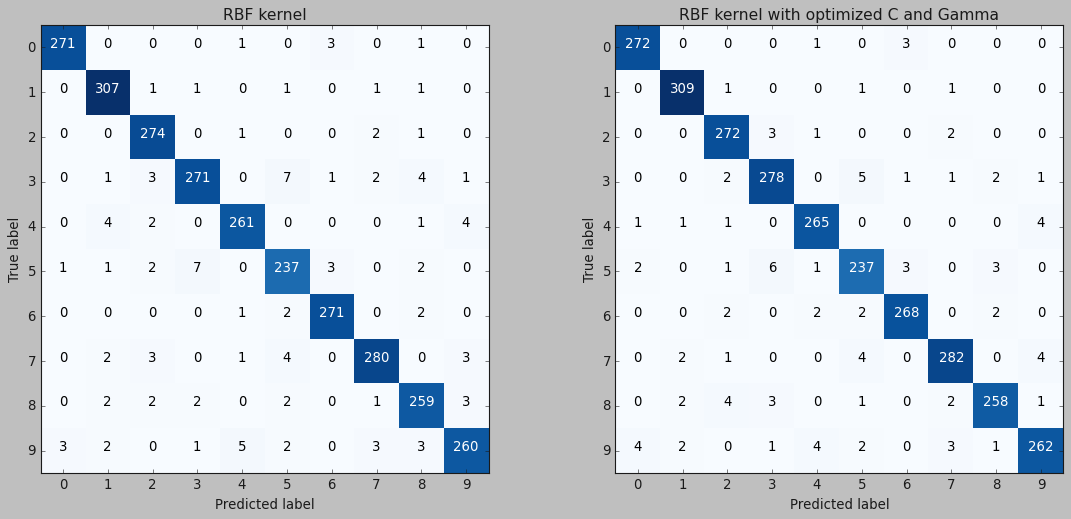

In [59]:
plt.style.use('classic')
class_names = [0,1,2,3,4,5,6,7,8,9]
fig = plt.figure(figsize = (17,7))
plt.subplot(121)
cm_model=cm_rbf
plot_cm(cm_model, 'RBF kernel', class_names, normalize=False)
plt.subplot(122)
cm_model=cm_rbf_optim
plot_cm(cm_model, 'RBF kernel with optimized C and Gamma', class_names, normalize=False)

In [74]:
#This is a our modified version of a helper function found on kaggle
import math
import random
def plot_digits(N_samples, X, y, Label):
    
    n, m = X.shape
        
    rows = int(round(np.sqrt(N_samples)))
    columns = math.ceil(N_samples/rows)
    
    sample_i = random.sample(range(0, n), N_samples)
    
    target_label=[y.values[sample_i[i]] for i in range(N_samples)]
    tl = sum([arr.tolist() for arr in target_label], [])
    
    
    fig, ax = plt.subplots(rows, columns, figsize=(10,6))
    plt.tight_layout(pad = 0.2, w_pad = .1, h_pad=.1)
    
    for i in range(0, rows * columns):
    
        if i < N_samples:

                data = X.iloc[sample_i[i],:].values #this is the first number
                pix_rows, pix_cols = int(math.sqrt(m)), int(math.sqrt(m))
                grid = data.reshape((pix_rows, pix_cols))
                ax[i // columns, i % columns].imshow(grid, cmap='BuPu')
                ax[i // columns, i % columns].axis('off') 
                ax[i // columns, i % columns].set_title(str(Label) + str(tl[i]))
                
        else:
                ax[i // columns, i % columns].axis('off')

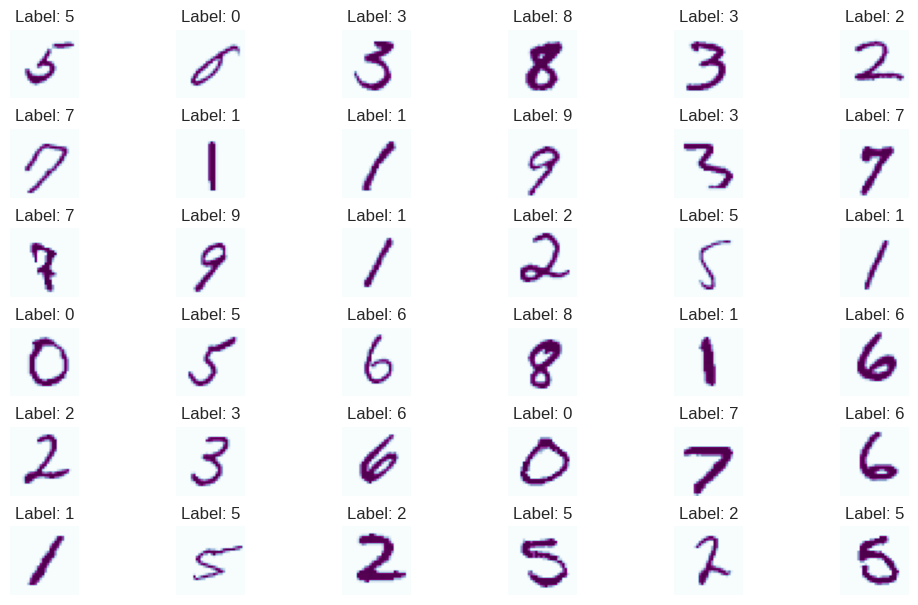

In [166]:
#Sample data
plt.style.use('seaborn-dark')
plot_digits(36, X_sample, pd.DataFrame(y_sample), 'Label: ')

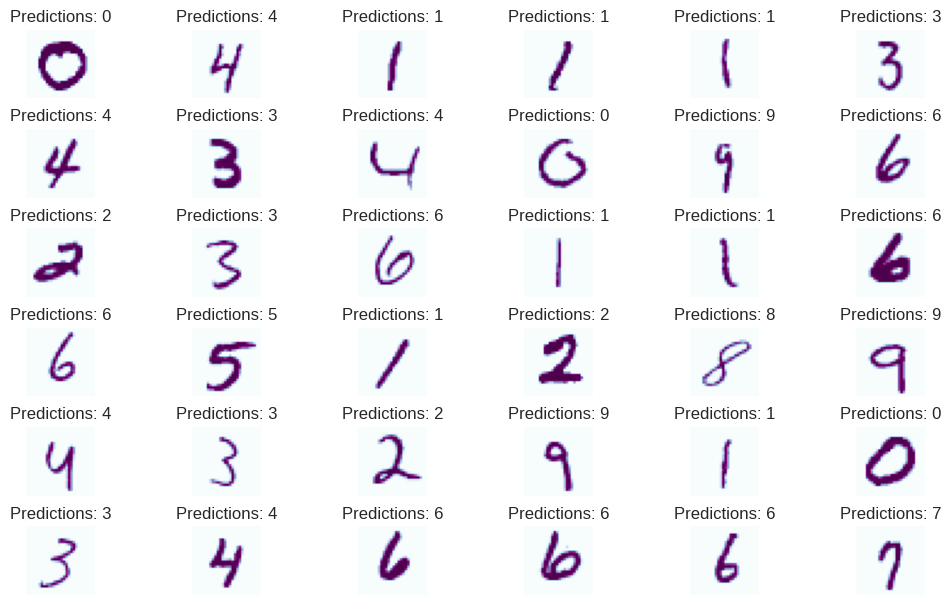

In [164]:
plt.style.use('seaborn-dark')
plot_digits(36, pd.DataFrame(X_test_scaled), pd.DataFrame(y_predict_rbf_optim), 'Predictions: ')

<p style='color:#ffdd33; font-size:24px; text-align:right'>Prédictions</p>

In [87]:
chiffres_test.head(2)
chiffres_test_scaled = scaler.transform(chiffres_test)
y_predict_rbf_optim_test = svc_rbf_optim.predict(chiffres_test_scaled) 

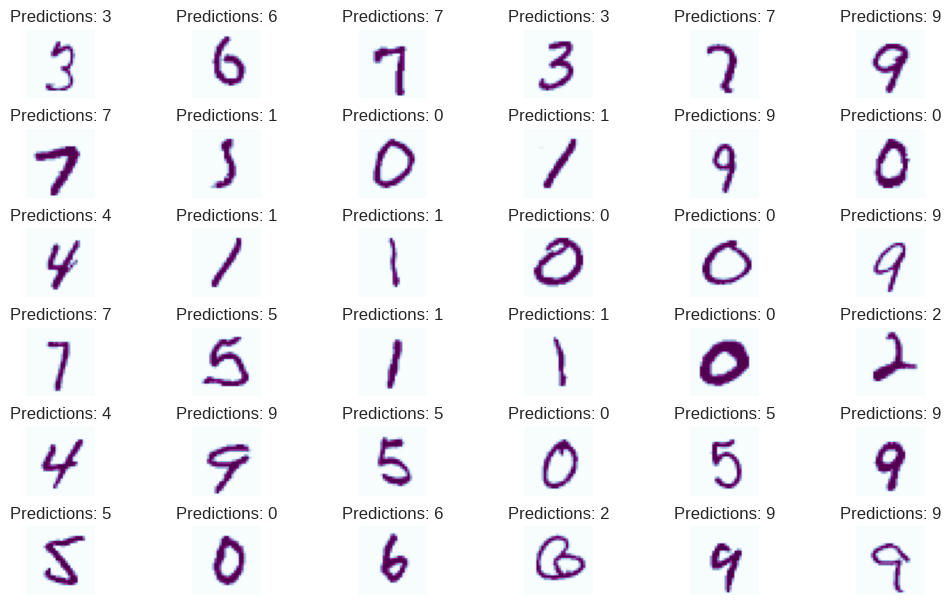

In [165]:
plt.style.use('seaborn-dark')
plot_digits(36, pd.DataFrame(chiffres_test_scaled), pd.DataFrame(y_predict_rbf_optim_test), 'Predictions: ')

In [208]:
chiffres_test.head(2)
scaler.fit(chiffres_test.iloc[0:10])

MinMaxScaler()

In [216]:
chiffres_test_scaled=scaler.transform(chiffres_test.iloc[2:12])

In [217]:
chiffres_test_scaled=pd.DataFrame(chiffres_test_scaled, columns=chiffres_test.iloc[2:12].columns)

In [218]:
y_predict_final = svc_rbf_optim.predict(chiffres_test_scaled) 

In [219]:
y_predict_final

array([9, 9, 3, 7, 0, 3, 0, 3, 5, 5])

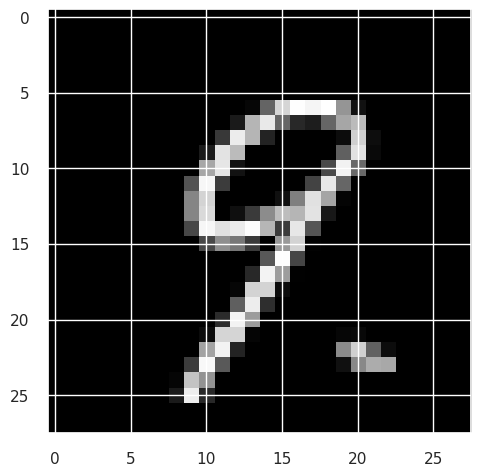

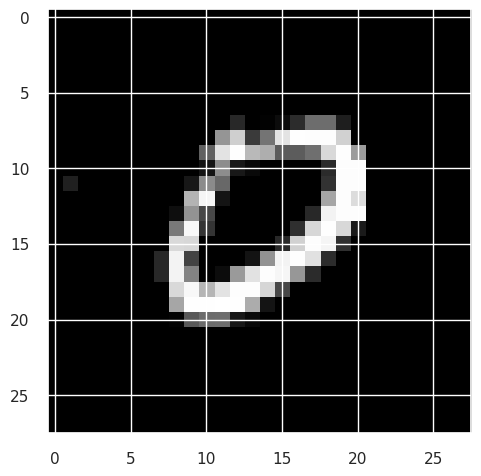

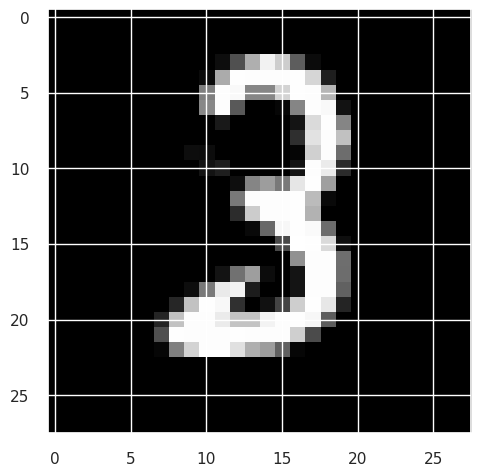

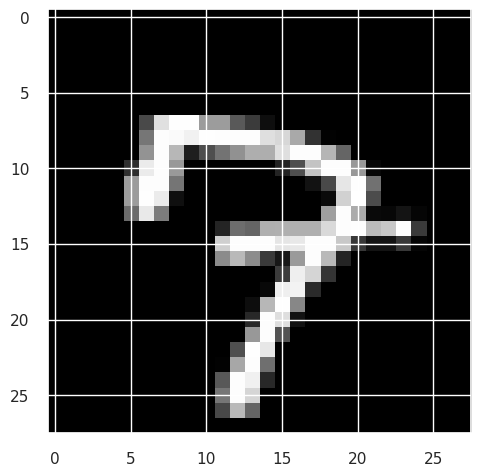

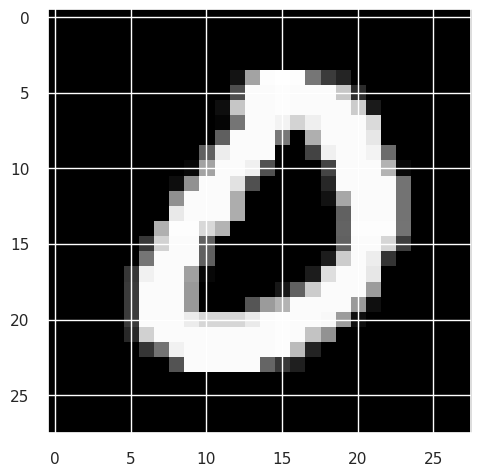

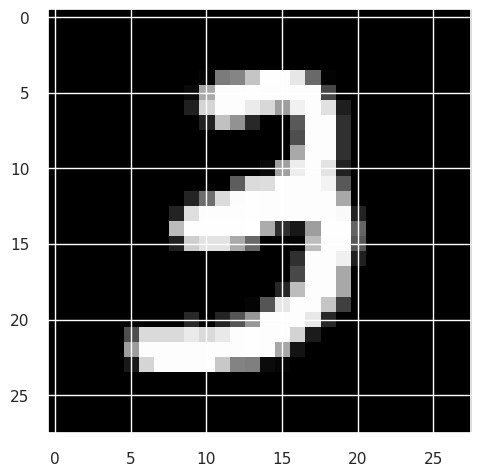

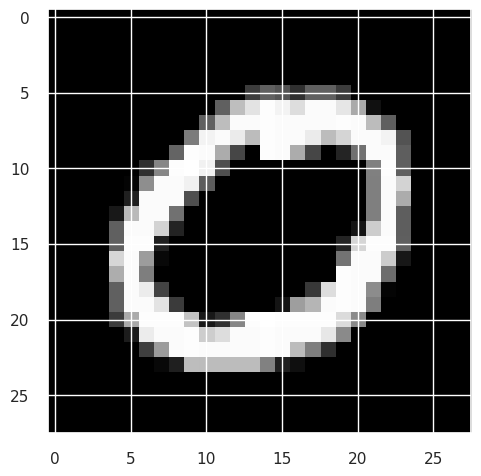

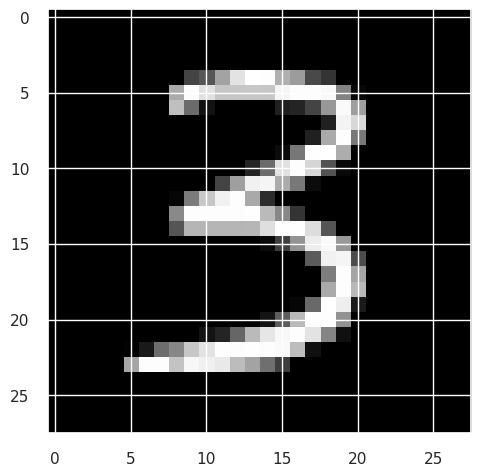

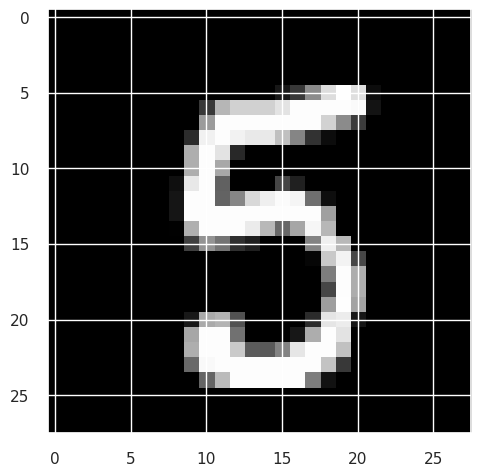

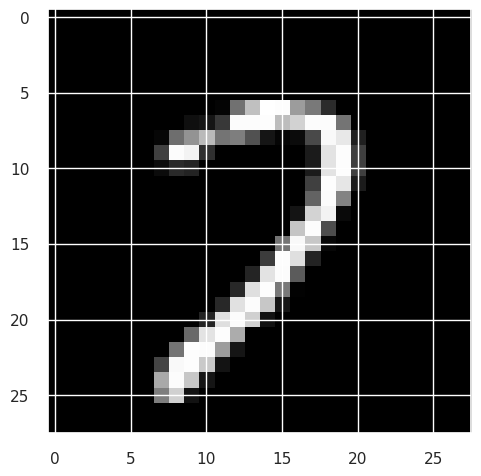

In [226]:
for i in range(2, 12):
    chiffre_t = np.matrix(chiffres_test)
    img = chiffre_t[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.show()